<a href="https://colab.research.google.com/github/oxzoid/Assingment-Parameter-Optimization/blob/main/parameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit


In [10]:
X, y = fetch_openml("letter", version=1, return_X_y=True, as_frame=False)

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [22]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
splits = list(sss.split(X, y))


In [23]:
param_dist = {
    'nu': uniform(0.1, 0.2),           # Avoid extreme nu
    'kernel': ['linear', 'rbf'],       # Fastest kernels
    'gamma': ['scale']                 # Simplify gamma
}


In [24]:
results = []
all_convergence = []

for i, (train_idx, test_idx) in enumerate(splits):
    print(f"\n🔁 Starting Sample {i+1}/1...")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    search = RandomizedSearchCV(
        NuSVC(),
        param_distributions=param_dist,
        n_iter=15,               # Fast search
        scoring='accuracy',
        cv=2,                    # Reduced CV
        verbose=1,               # Minimal console spam
        n_jobs=1,                # Safe for Colab
        random_state=42,
        return_train_score=True
    )

    search.fit(X_train, y_train)

    y_pred = search.best_estimator_.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"✅ Sample {i+1} completed. Accuracy: {acc:.4f}")

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': acc,
        'Best Parameters': search.best_params_
    })

    all_convergence.append(search.cv_results_['mean_test_score'])



🔁 Starting Sample 1/1...
Fitting 2 folds for each of 15 candidates, totalling 30 fits
✅ Sample 1 completed. Accuracy: 0.9512


In [25]:
df_results = pd.DataFrame(results)
df_results


,Sample,Best Accuracy,Best Parameters
0,S1,0.951167,"{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.10..."


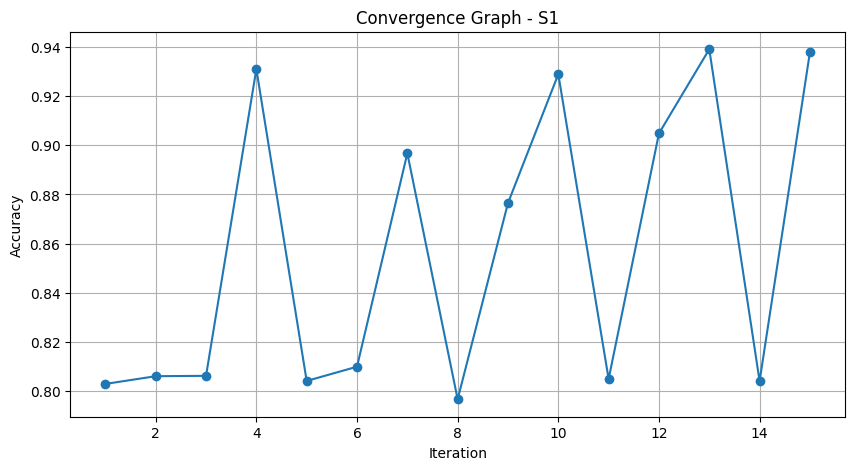

In [26]:
best_index = df_results['Best Accuracy'].idxmax()
best_sample_name = df_results.iloc[best_index]['Sample']
convergence_data = all_convergence[best_index]

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(convergence_data) + 1), convergence_data, marker='o')
plt.title(f'Convergence Graph - {best_sample_name}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


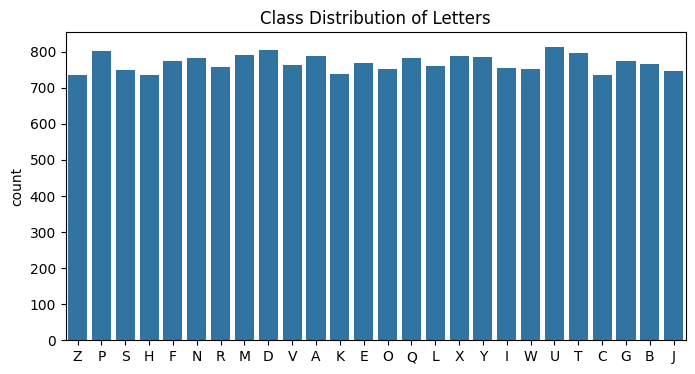

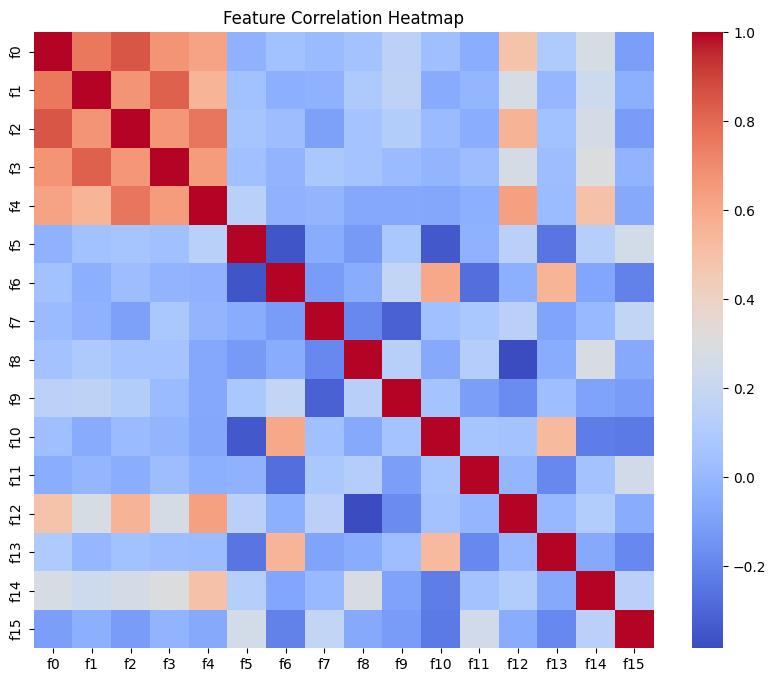

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title("Class Distribution of Letters")
plt.show()

df_full = pd.DataFrame(X, columns=[f'f{i}' for i in range(X.shape[1])])
corr = df_full.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
